In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("cleaned_train.xlsx")
df

department    region  education  gender  recruitment_channel  \
0        0.808933 -0.713357          2       0                    2   
1       -0.388183  0.773827          0       1                    0   
2        0.808933  0.476390          0       1                    2   
3        0.808933  0.872972          0       1                    0   
4        1.207972  1.170409          0       1                    0   
...           ...       ...        ...     ...                  ...   
54803    1.207972 -0.019338          0       1                    2   
54804   -0.388183  1.269554          2       0                    0   
54805   -1.984338 -1.308230          0       1                    0   
54806    0.808933 -0.515066          0       1                    2   
54807   -1.186261  0.773827          0       1                    0   

       no_of_trainings       age  previous_year_rating  length_of_service  \
0            -0.415276  1.080008                   5.0           2.445386   
1            -0.415276  1.072937                   5.0           1.543081   
2            -0.415276  1.078751                   3.0           2.264094   
3             1.226063  1.084425                   1.0           2.756672   
4            -0.415276  1.089652                   3.0           0.730957   
...                ...       ...                   ...                ...   
54803        -0.415276  1.091801                   3.0           3.540692   
54804        -0.415276  1.082329                   2.0           2.059330   
54805        -0.415276  1.067518                   5.0           1.195609   
54806        -0.415276  1.071248                   1.0           0.730957   
54807        -0.415276  1.067518                   1.0           1.823255   

       KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0                  1            0           -1.075931            0  
1                  0            0           -0.253282            0  
2                  0            0           -1.001145            0  
3                  0            0           -1.001145            0  
4                  0            0            0.718939            0  
...              ...          ...                 ...          ...  
54803              0            0            1.092871            0  
54804              0            0           -0.552428            0  
54805              1            0            1.167657            0  
54806              0            0           -1.375077            0  
54807              0            0           -1.075931            0  

[54808 rows x 13 columns]

**x&y**

In [3]:
x = df.drop(columns="is_promoted")
y = df["is_promoted"]

# LOGISTIC REGRESSION

In [4]:
# Modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x,y)

# prediction
y_pred = log_model.predict(x)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(log_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.9175667785724712
cv 0.9175302990362024


In [5]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

[[49948   192]
 [ 4326   342]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.64      0.07      0.13      4668

    accuracy                           0.92     54808
   macro avg       0.78      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



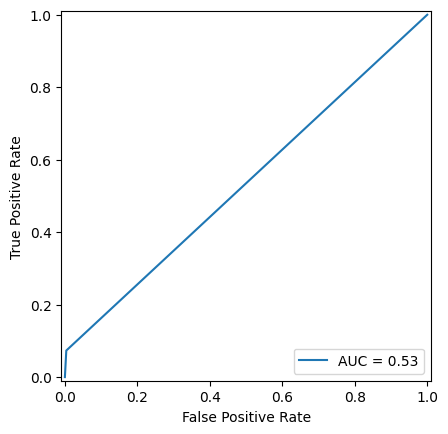

In [6]:
# ROC Curve

from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,threshold = roc_curve(y,y_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [7]:
# AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

0.5347177517347315

# RANDOM FOREST

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning

estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10))}
rf_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
rf_grid.fit(x,y)

# Random Forest best Hyperparameter Tuning
rf = rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=8, random_state=True)

In [9]:
# Important Features

feats_ab = pd.DataFrame(data=rf.feature_importances_,
                       index=x.columns,
                       columns=['Importance'])
importance_features_rf = feats_ab[feats_ab["Importance"]>0].index.tolist()
importance_features_rf 

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [10]:
# Modelling

rf_model = rf_grid.best_estimator_
rf_model.fit(x,y)

# prediction
y_pred_rf = rf_model.predict(x)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred_rf))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(rf_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.9880126988760765
cv 0.9300101830575077


In [11]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred_rf))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_rf))

[[50129    11]
 [  646  4022]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50140
           1       1.00      0.86      0.92      4668

    accuracy                           0.99     54808
   macro avg       0.99      0.93      0.96     54808
weighted avg       0.99      0.99      0.99     54808



# ADA BOOST 

In [12]:
from sklearn.ensemble import AdaBoostClassifier

# Hyperparameter Tuning

estimator = AdaBoostClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10))}
ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(x,y)

# AdaBoost best Hyperparameter Tuning
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=True)

In [13]:
# Important Features

feats_ab = pd.DataFrame(data=ab.feature_importances_,
                       index=x.columns,
                       columns=['Importance'])
importance_features_ab = feats_ab[feats_ab["Importance"]>0].index.tolist()
importance_features_ab

['avg_training_score']

In [14]:
# Modelling

ab_model = ab_grid.best_estimator_
ab_model.fit(x,y)

# prediction
y_pred_ab = ab_model.predict(x)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred_ab))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(ab_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.9228032404028609
cv 0.9228032558951899


In [15]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred_ab))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_ab))

[[50069    71]
 [ 4160   508]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.88      0.11      0.19      4668

    accuracy                           0.92     54808
   macro avg       0.90      0.55      0.58     54808
weighted avg       0.92      0.92      0.89     54808



# GRADIENT BOOST CLASSIFIER

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter Tuning

estimator = GradientBoostingClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,10)),
             "learning_rate":[0,0.1,0.5,0.8,1]}
gb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
gb_grid.fit(x,y)

# GradientBoost best Hyperparameter Tuning
gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.8, n_estimators=8, random_state=True)

In [17]:
# Important Features

feats_gb = pd.DataFrame(data=gb.feature_importances_,
                       index=x.columns,
                       columns=['Importance'])
importance_features_gb = feats_gb[feats_gb["Importance"]>0].index.tolist()
importance_features_gb

['department',
 'region',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [18]:
# Modelling

gb_model = gb_grid.best_estimator_
gb_model.fit(x,y)

# prediction
y_pred_gb = gb_model.predict(x)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred_gb))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(gb_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.9303933732301853
cv 0.9348817865986889


In [19]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred_gb))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_gb))

[[49795   345]
 [ 3470  1198]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     50140
           1       0.78      0.26      0.39      4668

    accuracy                           0.93     54808
   macro avg       0.86      0.62      0.67     54808
weighted avg       0.92      0.93      0.91     54808



# XGBOOST CLASSIFIER

In [20]:
from xgboost import XGBClassifier

# Hyperparameter Tuning

estimator = XGBClassifier()
param_grid = {"n_estimators":[10,30,60,80,100],
             "max_depth":[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(x,y)

# XGBoost best Hyperparameter Tuning
xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
# Important Features

feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                       index=x.columns,
                       columns=['Importance'])
importance_features_xgb = feats_xgb[feats_xgb["Importance"]>0].index.tolist()
importance_features_xgb

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [22]:
# Modelling

xgb_model = xgb_grid.best_estimator_
xgb_model.fit(x,y)

# prediction
y_pred_xgb = xgb_model.predict(x)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred_xgb))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(xgb_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.944661363304627
cv 0.942252990612535


In [23]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred_xgb))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_xgb))

[[50087    53]
 [ 2980  1688]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.97      0.36      0.53      4668

    accuracy                           0.94     54808
   macro avg       0.96      0.68      0.75     54808
weighted avg       0.95      0.94      0.93     54808



# DECISION TREE CLASSIFIER

In [24]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=True)
model.fit(x,y)

DecisionTreeClassifier(random_state=True)

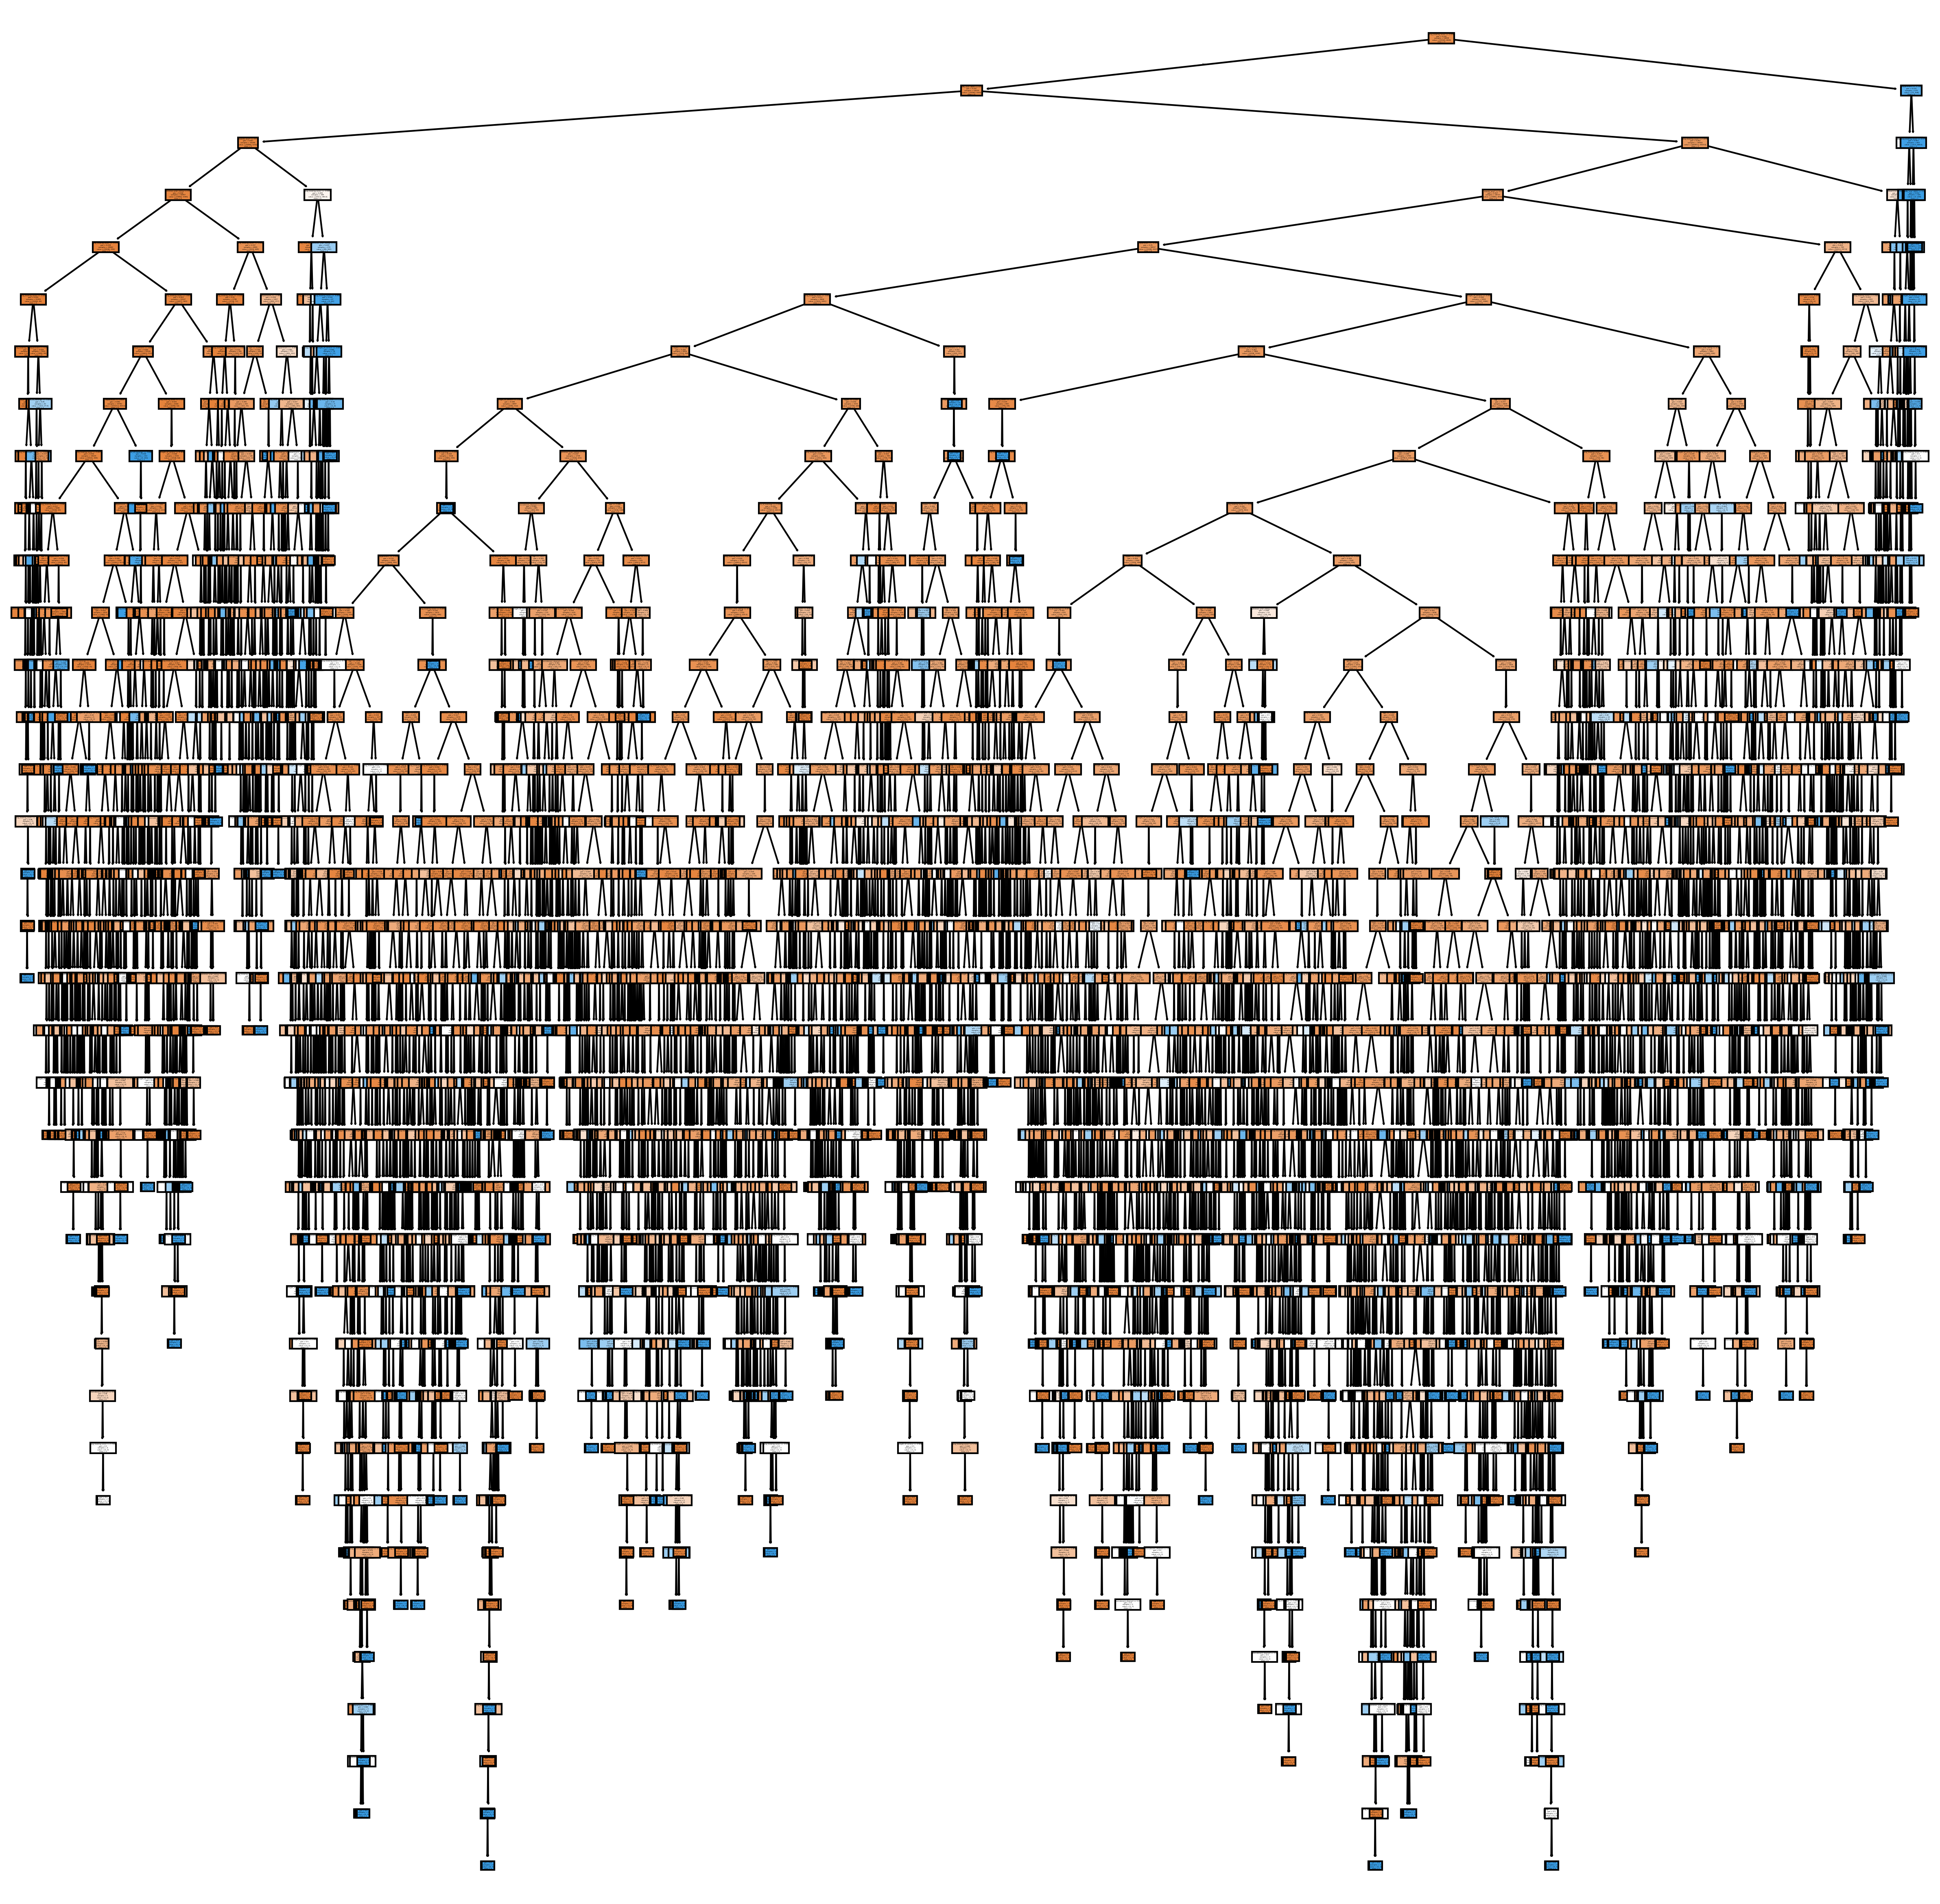

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,
         feature_names=x.columns.tolist(),
         class_names=["0","1"])
plt.show()

In [26]:
# Hyperparameter Tuning
estimator = DecisionTreeClassifier()

param_grid = {"criterion":["gini","entropy"],
             "max_depth":list(range(10,20))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(x,y)

# Decison Tree best Hyperparameter Tuning
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [27]:
# Important Features

feats_dt = pd.DataFrame(data=dt.feature_importances_,
                       index=x.columns,
                       columns=['Importance'])
importance_features_dt = feats_dt[feats_dt["Importance"]>0].index.tolist()
importance_features_dt

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score']

In [28]:
# Selecting the important features

x_new_dt = x[importance_features_dt]

# Modelling

dt_model = dt_grid.best_estimator_
dt_model.fit(x_new_dt,y)

# prediction
y_pred_dt = dt_model.predict(x_new_dt)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train_Accuracy",accuracy_score(y,y_pred_dt))

# cv
from sklearn.model_selection import cross_val_score
print("cv",cross_val_score(dt_model,x,y,cv=5,scoring="accuracy").mean())


Train_Accuracy 0.9440045248868778
cv 0.9370894845187714


In [29]:
# confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_pred_dt))

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_dt))

[[50073    67]
 [ 3002  1666]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     50140
           1       0.96      0.36      0.52      4668

    accuracy                           0.94     54808
   macro avg       0.95      0.68      0.75     54808
weighted avg       0.94      0.94      0.93     54808



# SVM

In [30]:
df1 = pd.read_excel("cleaned_test.xlsx")

In [31]:
df1

department    region  education  gender  recruitment_channel  \
0        1.206058  1.153565          0       1                    2   
1       -1.180154 -1.013631          0       0                    0   
2        0.808356 -0.127051          0       1                    0   
3        0.012952 -1.210649          0       0                    0   
4       -1.577856  1.449092          0       1                    2   
...           ...       ...        ...     ...                  ...   
23485   -0.782452 -1.210649          1       1                    2   
23486    1.206058  1.055056          0       1                    2   
23487   -1.180154  0.168476          0       0                    2   
23488    0.012952  1.646109          0       1                    2   
23489    1.206058  0.266985          2       1                    0   

       no_of_trainings       age  previous_year_rating  length_of_service  \
0            -0.423094  1.055023              3.339146           0.000000   
1            -0.423094  1.068452              3.000000           1.826740   
2            -0.423094  1.068452              1.000000           1.545607   
3             2.905264  1.068452              2.000000           2.615285   
4            -0.423094  1.066897              4.000000           2.269371   
...                ...       ...                   ...                ...   
23485        -0.423094  1.055023              3.000000           0.000000   
23486        -0.423094  1.068452              3.000000           2.269371   
23487        -0.423094  1.059557              4.000000           1.545607   
23488         2.905264  1.061585              3.339146           0.000000   
23489         2.905264  1.079100              5.000000           1.826740   

       KPIs_met >80%  awards_won?  avg_training_score  
0                  1            0            1.024263  
1                  0            0           -0.914377  
2                  0            0           -1.212629  
3                  0            0            0.129506  
4                  0            0           -0.168746  
...              ...          ...                 ...  
23485              0            0           -0.168746  
23486              0            0            0.800574  
23487              0            0           -0.988940  
23488              0            0            0.502321  
23489              1            0            1.919020  

[23490 rows x 12 columns]

In [32]:
y_pred_rf_test = rf_model.predict(df1)

In [34]:
final = pd.DataFrame(y_pred_rf_test)

In [46]:
final.to_excel("output.xlsx",index=False)

In [36]:
df3 = pd.read_csv("sample_submission.csv")

In [37]:
df3

employee_id  is_promoted
0             8724            0
1            74430            0
2            72255            0
3            38562            0
4            64486            0
...            ...          ...
23485        53478            0
23486        25600            0
23487        45409            0
23488         1186            0
23489         5973            0

[23490 rows x 2 columns]

In [40]:
final1 = pd.concat((final,df3),axis=1)

In [41]:
final1

0  employee_id  is_promoted
0      0         8724            0
1      0        74430            0
2      0        72255            0
3      0        38562            0
4      0        64486            0
...   ..          ...          ...
23485  0        53478            0
23486  0        25600            0
23487  0        45409            0
23488  0         1186            0
23489  1         5973            0

[23490 rows x 3 columns]

In [43]:
final1.drop(columns="is_promoted",inplace=True)

In [45]:
final1.rename({0:"is_promoted"})

0  employee_id
is_promoted  0         8724
1            0        74430
2            0        72255
3            0        38562
4            0        64486
...         ..          ...
23485        0        53478
23486        0        25600
23487        0        45409
23488        0         1186
23489        1         5973

[23490 rows x 2 columns]